**Garbage Classification - Comparartive Analysis between KNN and CNN**

**Importing libraries**

In [ ]:
import os
import random
import cv2
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms
import glob
from sklearn.neighbors import KNeighborsClassifier
from torchvision.utils import make_grid
from torch.utils import data
import torch
import torchvision
import numpy as np
from keras.preprocessing import image
from pathlib import Path
from sklearn.model_selection import GridSearchCV, train_test_split
from skimage.io import imread
import pandas as pd
from sklearn.decomposition import PCA
from builtins import range
from builtins import object
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


**downloading dataset**

In [ ]:
!gdown --id 1-v22o1HJZl-66RyTWwXApnyXHs4kfseF

Downloading...
From: https://drive.google.com/uc?id=1-v22o1HJZl-66RyTWwXApnyXHs4kfseF
To: /content/kaggle.json
100% 63.0/63.0 [00:00<00:00, 28.1kB/s]


In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = "/content/"

In [ ]:
!kaggle datasets download -d asdasdasasdas/garbage-classification

garbage-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


**Setting up TPU environment**

In [ ]:
# Setting up Colab TPU environment for optimal training
assert os.environ['COLAB_TPU_ADDR'], 'Make sure to select TPU from Edit > Notebook settings > Hardware accelerator'

In [ ]:
# installing libraries for effective use of TPU resources
!pip install cloud-tpu-client==0.10 https://storage.googleapis.com/tpu-pytorch/wheels/torch_xla-1.9-cp37-cp37m-linux_x86_64.whl

  Using cached https://storage.googleapis.com/tpu-pytorch/wheels/torch_xla-1.9-cp37-cp37m-linux_x86_64.whl (149.9 MB)


In [ ]:
!pip install torch==1.9.0+cu111 torchvision==0.10.0+cu111 torchtext==0.10.0 -f https://download.pytorch.org/whl/cu111/torch_stable.html


Looking in links: https://download.pytorch.org/whl/cu111/torch_stable.html
     |█████████████                   | 834.1 MB 1.5 MB/s eta 0:13:03tcmalloc: large alloc 1147494400 bytes == 0x564001530000 @  0x7f715fc41615 0x563fc7ca74cc 0x563fc7d8747a 0x563fc7caa2ed 0x563fc7d9be1d 0x563fc7d1de99 0x563fc7d189ee 0x563fc7cabbda 0x563fc7d1dd00 0x563fc7d189ee 0x563fc7cabbda 0x563fc7d1a737 0x563fc7d9cc66 0x563fc7d19daf 0x563fc7d9cc66 0x563fc7d19daf 0x563fc7d9cc66 0x563fc7d19daf 0x563fc7cac039 0x563fc7cef409 0x563fc7caac52 0x563fc7d1dc25 0x563fc7d189ee 0x563fc7cabbda 0x563fc7d1a737 0x563fc7d189ee 0x563fc7cabbda 0x563fc7d19915 0x563fc7cabafa 0x563fc7d19c0d 0x563fc7d189ee
     |████████████████▌               | 1055.7 MB 1.5 MB/s eta 0:11:12tcmalloc: large alloc 1434370048 bytes == 0x564045b86000 @  0x7f715fc41615 0x563fc7ca74cc 0x563fc7d8747a 0x563fc7caa2ed 0x563fc7d9be1d 0x563fc7d1de99 0x563fc7d189ee 0x563fc7cabbda 0x563fc7d1dd00 0x563fc7d189ee 0x563fc7cabbda 0x563fc7d1a737 0x563fc7d9cc66 0x563f

**making essential directories**

In [ ]:
#making directories
isExist = os.path.exists("/content/binarizing")
#os.mkdir("/content/train")
if not isExist:
  !unzip \*.zip  && rm *.zip
  os.mkdir("/content/gray scale")
  os.mkdir("/content/binarizing")
  os.mkdir("/content/gray scale/cardboard")
  os.mkdir("/content/gray scale/glass")
  os.mkdir("/content/gray scale/metal")
  os.mkdir("/content/gray scale/paper")
  os.mkdir("/content/gray scale/plastic")
  os.mkdir("/content/gray scale/trash")
  os.mkdir("/content/binarizing/cardboard")
  os.mkdir("/content/binarizing/glass")
  os.mkdir("/content/binarizing/metal")
  os.mkdir("/content/binarizing/paper")
  os.mkdir("/content/binarizing/plastic")
  os.mkdir("/content/binarizing/trash")

##**Data Preprocessing**

In [ ]:
#Displaying image sizes in initial dataset
raw_image =mpimg.imread('/content/garbage classification/Garbage classification/cardboard/cardboard104.jpg')
print("Size of a cardboard image: ",raw_image.shape)
raw_image =mpimg.imread('/content/garbage classification/Garbage classification/glass/glass1.jpg')
print("Size of a glass image: ",raw_image.shape)


Size of a cardboard image:  (384, 512, 3)
Size of a glass image:  (384, 512, 3)


**Gray scaling images and resizing them**

Size of a cardboard image:  (128, 128)


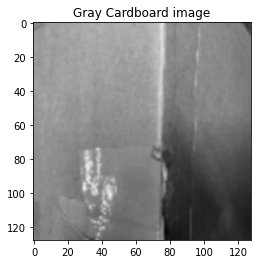

In [ ]:
#gray scale
os.chdir('/content/Garbage classification/Garbage classification/cardboard')
for fil in glob.glob("*.jpg"): 
    image = cv2.imread(fil) 
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray_image = cv2.resize(gray_image, (128,128))
    #
    cv2.imwrite(os.path.join("/content/gray scale/cardboard",fil),gray_image)
 
#image gray
img_gray = mpimg.imread('/content/gray scale/cardboard/cardboard104.jpg')
print("Size of a cardboard image: ",img_gray.shape)
plt.title("Gray Cardboard image")
imgplot = plt.imshow(img_gray, cmap = 'gray', interpolation = 'bicubic')
plt.show()

Size of a glass image:  (128, 128)


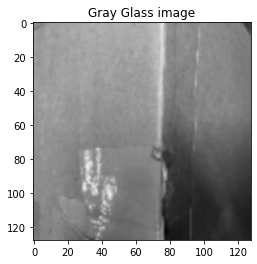

In [ ]:
os.chdir('/content/Garbage classification/Garbage classification/glass')
for fil in glob.glob("*.jpg"): 
    image = cv2.imread(fil) 
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray_image = cv2.resize(gray_image, (128,128))
    #norm_image = (gray_image - np.min(gray_image)) / (np.max(gray_image) - np.min(gray_image))
    cv2.imwrite(os.path.join("/content/gray scale/glass",fil),gray_image)
#sample image
img = mpimg.imread('/content/gray scale/glass/glass104.jpg')
imgplot = plt.imshow(img_gray, cmap = 'gray', interpolation = 'bicubic')
print("Size of a glass image: ",img_gray.shape)
plt.title("Gray Glass image")
plt.show()     

Size of a metal image:  (128, 128)


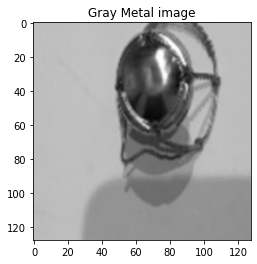

In [ ]:
os.chdir('/content/Garbage classification/Garbage classification/metal')
for fil in glob.glob("*.jpg"): 
    image = cv2.imread(fil) 
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray_image = cv2.resize(gray_image, (128,128))
   # norm_image=(gray_image - np.min(gray_image)) / (np.max(gray_image) - np.min(gray_image))
    cv2.imwrite(os.path.join("/content/gray scale/metal",fil),gray_image)
#sample image
img = mpimg.imread('/content/gray scale/metal/metal104.jpg')
print("Size of a metal image: ",img_gray.shape)
imgplot = plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.title("Gray Metal image")
plt.show()  

Size of a paper image:  (128, 128)


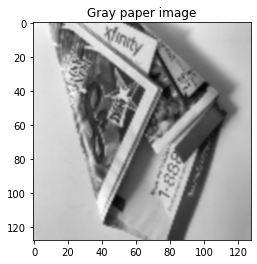

In [ ]:
os.chdir('/content/Garbage classification/Garbage classification/paper')
for fil in glob.glob("*.jpg"): 
    image = cv2.imread(fil) 
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray_image = cv2.resize(gray_image, (128,128))
    #norm_image=(gray_image - np.min(gray_image)) / (np.max(gray_image) - np.min(gray_image))
    cv2.imwrite(os.path.join("/content/gray scale/paper",fil),gray_image)
#sample image
img = mpimg.imread('/content/gray scale/paper/paper104.jpg')
print("Size of a paper image: ",img_gray.shape)
imgplot = plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.title("Gray paper image")
plt.show()  

Size of a plastic image:  (128, 128)


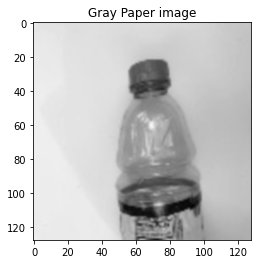

In [ ]:
os.chdir('/content/Garbage classification/Garbage classification/plastic')
for fil in glob.glob("*.jpg"): 
    image = cv2.imread(fil) 
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray_image = cv2.resize(gray_image, (128,128))
    cv2.imwrite(os.path.join("/content/gray scale/plastic",fil),gray_image)
#sample image
img = mpimg.imread('/content/gray scale/plastic/plastic104.jpg')
print("Size of a plastic image: ",img_gray.shape)
imgplot = plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.title("Gray Paper image")
plt.show()     

Size of a trash image:  (128, 128)


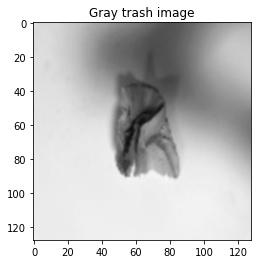

In [ ]:
os.chdir('/content/Garbage classification/Garbage classification/trash')
for fil in glob.glob("*.jpg"): 
    image = cv2.imread(fil) 
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray_image = cv2.resize(gray_image, (128,128))
    #norm_image=(gray_image - np.min(gray_image)) / (np.max(gray_image) - np.min(gray_image))
    cv2.imwrite(os.path.join("/content/gray scale/trash",fil),gray_image)
#sample image
img = mpimg.imread('/content/gray scale/trash/trash104.jpg')
print("Size of a trash image: ",img_gray.shape)
imgplot = plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.title("Gray trash image")
plt.show()     

**Binarizing images**

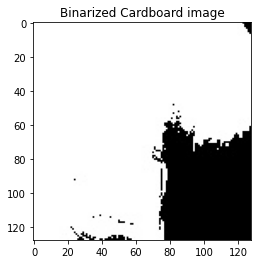

In [ ]:
os.chdir('/content/gray scale/cardboard')
for fil in glob.glob("*.jpg"):
    image = cv2.imread(fil)
    thresh = 128
    maxval = 255
    #gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    #gray_image_resize = cv2.resize(gray_image, (128,128))
    im_bool = image > thresh
    im_bin = (image > thresh) * maxval
    cv2.imwrite(os.path.join("/content/binarizing/cardboard",fil),im_bin)
#sample image
img = mpimg.imread('/content/binarizing/cardboard/cardboard104.jpg')
plt.title("Binarized Cardboard image")
imgplot = plt.imshow(img)
plt.show() 

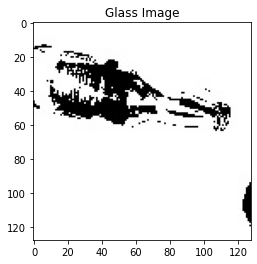

In [ ]:
os.chdir('/content/gray scale/glass')
for fil in glob.glob("*.jpg"):
    image = cv2.imread(fil)
    thresh = 128
    maxval = 255
    im_bool = image > thresh
    im_bin = (image> thresh) * maxval
    cv2.imwrite(os.path.join("/content/binarizing/glass",fil),im_bin)
#sample image
img = mpimg.imread('/content/binarizing/glass/glass104.jpg')
plt.title("Glass Image")
imgplot = plt.imshow(img)
plt.show() 

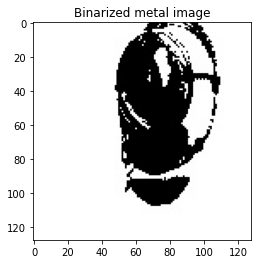

In [ ]:
os.chdir('/content/gray scale/metal')
for fil in glob.glob("*.jpg"):
    image = cv2.imread(fil)
    thresh = 128
    maxval = 255
    im_bool = image > thresh
    im_bin = (image > thresh) * maxval
    cv2.imwrite(os.path.join("/content/binarizing/metal",fil),im_bin)
#sample image
img = mpimg.imread('/content/binarizing/metal/metal104.jpg')
plt.title("Binarized metal image")
imgplot = plt.imshow(img)
plt.show() 

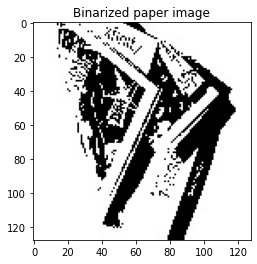

In [ ]:
os.chdir('/content/gray scale/paper')
for fil in glob.glob("*.jpg"):
    image = cv2.imread(fil)
    thresh = 128
    maxval = 255
    im_bool = image > thresh
    im_bin = (image> thresh) * maxval
    cv2.imwrite(os.path.join("/content/binarizing/paper",fil),im_bin)
#sample image
img = mpimg.imread('/content/binarizing/paper/paper104.jpg')
plt.title("Binarized paper image")
imgplot = plt.imshow(img)
plt.show()

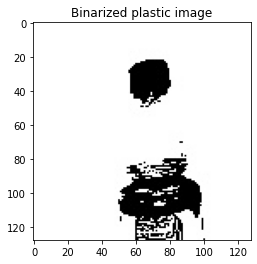

In [ ]:
os.chdir('/content/gray scale/plastic')
for fil in glob.glob("*.jpg"):
    image = cv2.imread(fil)
    thresh = 128
    maxval = 255
    im_bool = image > thresh
    im_bin = (image > thresh) * maxval
    cv2.imwrite(os.path.join("/content/binarizing/plastic",fil),im_bin)
#sample image
img = mpimg.imread('/content/binarizing/plastic/plastic104.jpg')
imgplot = plt.imshow(img)
plt.title("Binarized plastic image")
plt.show() 

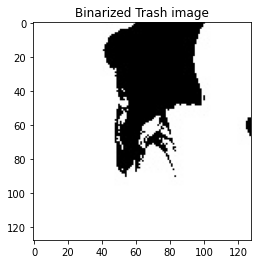

In [ ]:
os.chdir('/content/gray scale/trash')
for fil in glob.glob("*.jpg"):
    image = cv2.imread(fil)
    thresh = 128
    maxval = 255
    im_bool = image > thresh
    im_bin = (image > thresh) * maxval
    cv2.imwrite(os.path.join("/content/binarizing/trash",fil),im_bin)
#sample image
img = mpimg.imread('/content/binarizing/trash/trash104.jpg')
imgplot = plt.imshow(img)
plt.title("Binarized Trash image")
plt.show() 

In [ ]:
torch.manual_seed(random.randint(1,99))

In [ ]:
#directory for binarized images
data_dir_binarizing  = '/content/binarizing' #dataset directory
# listing six label classes in dataset
classes = os.listdir(data_dir_binarizing)
print(classes)

['trash', 'glass', 'metal', 'cardboard', 'paper', 'plastic']


In [ ]:
#directory for gray scale images
data_dir_grayscale  = '/content/gray scale' #dataset directory
# listing six label classes in dataset
classes = os.listdir(data_dir_grayscale)
print(classes)

['trash', 'glass', 'metal', 'cardboard', 'paper', 'plastic']


##**Applying KNN on binarized images**

In [ ]:
def load_image_files(container_path, dimension=(64, 64)):
  os.chdir(container_path)
  image_dir = Path(container_path)
  folders = [directory for directory in image_dir.iterdir() if directory.is_dir()]
  categories = [fo.name for fo in folders]
  descr = "A image classification dataset"
  images = []
  count = 0
  train_img = []
  for i, direc in enumerate(folders):
    for file in direc.iterdir():
      print(file)
      count += 1
      img = cv2.imread(str(file))
      #img_pred = cv2.resize(img, (50, 50), interpolation=cv2.INTER_AREA)
      #img_pred = img_to_array(img_pred)
      #img_pred = img_pred / 255
      train_img.append(img)

    print(count)
  print(count)
  X = np.array(train_img)
  return X
  

In [ ]:
X = []
X=load_image_files("/content/binarizing")


/content/binarizing/trash/trash97.jpg
/content/binarizing/trash/trash129.jpg
/content/binarizing/trash/trash123.jpg
/content/binarizing/trash/trash48.jpg
/content/binarizing/trash/trash108.jpg
/content/binarizing/trash/trash117.jpg
/content/binarizing/trash/trash39.jpg
/content/binarizing/trash/trash38.jpg
/content/binarizing/trash/trash96.jpg
/content/binarizing/trash/trash91.jpg
/content/binarizing/trash/trash106.jpg
/content/binarizing/trash/trash27.jpg
/content/binarizing/trash/trash105.jpg
/content/binarizing/trash/trash32.jpg
/content/binarizing/trash/trash33.jpg
/content/binarizing/trash/trash31.jpg
/content/binarizing/trash/trash57.jpg
/content/binarizing/trash/trash99.jpg
/content/binarizing/trash/trash72.jpg
/content/binarizing/trash/trash94.jpg
/content/binarizing/trash/trash15.jpg
/content/binarizing/trash/trash71.jpg
/content/binarizing/trash/trash78.jpg
/content/binarizing/trash/trash135.jpg
/content/binarizing/trash/trash14.jpg
/content/binarizing/trash/trash56.jpg
/cont

In [ ]:
print("Shape of X: ", X.shape)

Shape of X:  (2527, 128, 128, 3)


In [ ]:
y1=np.ones(137) #trash
y2=np.ones(501)*2 #glass
y3=np.ones(410)*3 #metal
y4=np.ones(403)*4 #cardboard
y5=np.ones(594)*5 #paper
y6=np.ones(482)*6 #plastic

In [ ]:
y = []
y = np.concatenate((y1,y2,y3,y4,y5,y6), axis=0)

In [ ]:
print("Shape of y: ",y.shape)

Shape of y:  (2527,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, random_state=42, test_size=0.5)
print("X_train: "+str(X_train.shape))
print("X_test: "+str(X_test.shape))
print("X_val: "+str(X_val.shape))
print("y_train: "+str(y_train.shape))
print("y_test: "+str(y_test.shape))
print("y_val: "+str(y_val.shape))

X_train: (2021, 128, 128, 3)
X_test: (253, 128, 128, 3)
X_val: (253, 128, 128, 3)
y_train: (2021,)
y_test: (253,)
y_val: (253,)


In [ ]:
num_training = X_train.shape[0]
mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]

num_test = X_test.shape[0]
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]

num_val = X_val.shape[0]
mask = list(range(num_val))
X_val = X_val[mask]
y_val = y_val[mask]

# Reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
X_val = np.reshape(X_val, (X_val.shape[0], -1))

print("X_train: "+str(X_train.shape))
print("X_test: "+str(X_test.shape))
print("X_val: "+str(X_val.shape))
print("y_train: "+str(y_train.shape))
print("y_test: "+str(y_test.shape))
print("y_val: "+str(y_val.shape))

X_train: (2021, 49152)
X_test: (253, 49152)
X_val: (253, 49152)
y_train: (2021,)
y_test: (253,)
y_val: (253,)


In [ ]:
# applying knn classifier with k=17
classifier = KNeighborsClassifier(n_neighbors=17)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=17)

In [ ]:
predictions = classifier.predict(X_test)
%time

CPU times: user 8 µs, sys: 1 µs, total: 9 µs
Wall time: 9.78 µs


In [ ]:
print('KNN Accuracy on binarized images: %.3f' % accuracy_score(y_test,predictions))
print('KNN f1 score on binarized images: %.3f' % f1_score(y_test,predictions, average='weighted'))

KNN Accuracy on binarized images: 0.403
KNN f1 score on binarized images: 0.387


Text(0.5, 1.0, 'Accuracy Score: 0.4031620553359684')

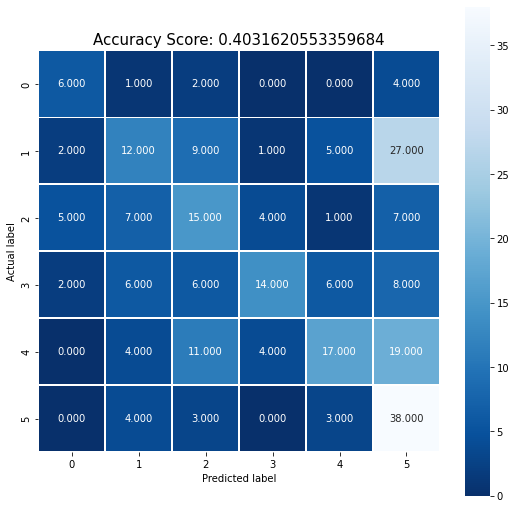

In [ ]:
cm = confusion_matrix(y_test,predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True, fmt='.3f', linewidths=.5, square=True,cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test,predictions))
plt.title(all_sample_title,size=15)

##**KNN using Gray scale images**

In [ ]:
X = []
X=load_image_files("/content/gray scale")


/content/gray scale/trash/trash97.jpg
/content/gray scale/trash/trash129.jpg
/content/gray scale/trash/trash123.jpg
/content/gray scale/trash/trash48.jpg
/content/gray scale/trash/trash108.jpg
/content/gray scale/trash/trash117.jpg
/content/gray scale/trash/trash39.jpg
/content/gray scale/trash/trash38.jpg
/content/gray scale/trash/trash96.jpg
/content/gray scale/trash/trash91.jpg
/content/gray scale/trash/trash106.jpg
/content/gray scale/trash/trash27.jpg
/content/gray scale/trash/trash105.jpg
/content/gray scale/trash/trash32.jpg
/content/gray scale/trash/trash33.jpg
/content/gray scale/trash/trash31.jpg
/content/gray scale/trash/trash57.jpg
/content/gray scale/trash/trash99.jpg
/content/gray scale/trash/trash72.jpg
/content/gray scale/trash/trash94.jpg
/content/gray scale/trash/trash15.jpg
/content/gray scale/trash/trash71.jpg
/content/gray scale/trash/trash78.jpg
/content/gray scale/trash/trash135.jpg
/content/gray scale/trash/trash14.jpg
/content/gray scale/trash/trash56.jpg
/cont

In [ ]:
print("Shape of X: ", X.shape)

Shape of X:  (2527, 128, 128, 3)


In [ ]:
y1=np.ones(137) #trash
y2=np.ones(501)*2 #glass
y3=np.ones(410)*3 #metal
y4=np.ones(403)*4 #cardboard
y5=np.ones(594)*5 #paper
y6=np.ones(482)*6 #plastic

In [ ]:
y = []
y = np.concatenate((y1,y2,y3,y4,y5,y6), axis=0)

In [ ]:
print("Shape of y: ",y.shape)

Shape of y:  (2527,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, random_state=42, test_size=0.5)
print("X_train: "+str(X_train.shape))
print("X_test: "+str(X_test.shape))
print("X_val: "+str(X_val.shape))
print("y_train: "+str(y_train.shape))
print("y_test: "+str(y_test.shape))
print("y_val: "+str(y_val.shape))

X_train: (2021, 128, 128, 3)
X_test: (253, 128, 128, 3)
X_val: (253, 128, 128, 3)
y_train: (2021,)
y_test: (253,)
y_val: (253,)


In [ ]:
num_training = X_train.shape[0]
mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]

num_test = X_test.shape[0]
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]

num_val = X_val.shape[0]
mask = list(range(num_val))
X_val = X_val[mask]
y_val = y_val[mask]

# Reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
X_val = np.reshape(X_val, (X_val.shape[0], -1))

print("X_train: "+str(X_train.shape))
print("X_test: "+str(X_test.shape))
print("X_val: "+str(X_val.shape))
print("y_train: "+str(y_train.shape))
print("y_test: "+str(y_test.shape))
print("y_val: "+str(y_val.shape))

X_train: (2021, 49152)
X_test: (253, 49152)
X_val: (253, 49152)
y_train: (2021,)
y_test: (253,)
y_val: (253,)


In [ ]:
# applying knn classifier with k=5
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
predictions = classifier.predict(X_test)
%time

CPU times: user 7 µs, sys: 1 µs, total: 8 µs
Wall time: 8.34 µs


In [ ]:
print('KNN Accuracy on gray scale images: %.3f' % accuracy_score(y_test,predictions))
print('KNN f1 score on gray scale images: %.3f' % f1_score(y_test,predictions, average='weighted'))

KNN Accuracy on gray scale images: 0.423
KNN f1 score on gray scale images: 0.409


Text(0.5, 1.0, 'Accuracy Score: 0.42292490118577075')

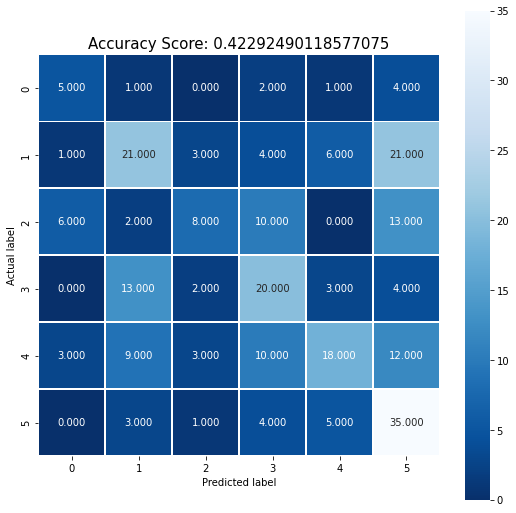

In [ ]:
cm = confusion_matrix(y_test,predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True, fmt='.3f', linewidths=.5, square=True,cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test,predictions))
plt.title(all_sample_title,size=15)

##**Applying CNN on dataset**

In [ ]:
# Defining PyTorch transformations to set resolution of images to 256x256 pixels, and convert their data to a tensor
transformations = transforms.Compose([transforms.Resize((256, 256)), transforms.ToTensor()]) 

# applying above transformations to whole image dataset and then storing in variable
dataset = ImageFolder(data_dir_grayscale, transform = transformations)
print(len(dataset))

2527


In [ ]:
# splitting data into training, validation and testing datasets, with lengths of each printed
train_data, val_data, test_data = data.random_split(dataset, [1593, 176, 758])
print("training set: ",len(train_data))
print("test set: ",len(test_data))
print("validation set: ",len(val_data))


training set:  1593
test set:  758
validation set:  176


In [ ]:
from torch.utils.data.dataloader import DataLoader
batch_size = 32 # setting batch size for epoch training

In [ ]:
# configuring DataLoader objects for training and validation data to use in epochs
train_dataloader = DataLoader(train_data, batch_size, shuffle = True, num_workers=4,pin_memory = True)
val_dataloader = DataLoader(val_data, batch_size*2, num_workers = 4, pin_memory = True)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
def show_batch(dl): # function to show batch of images from DataLoader object
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(make_grid(images, nrow = 16).permute(1, 2, 0))
        break

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


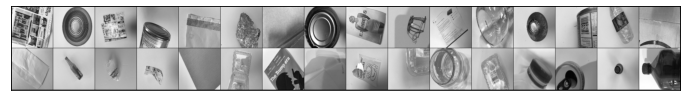

In [ ]:
show_batch(train_dataloader) # showing sample batch from training DataLoader

In [ ]:
# function to compute accuracy of predictions from model
import torch.nn as nn
import torch.nn.functional as F 
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

# Base class built by extending nn.Module, functions added for training, validation and end of epoch steps
class ImageClassificationBase(nn.Module):
    def training_step(self, batch): # invoked while training model in epoch for a single training batch
        images, labels = batch # images and labels from labels are fetched from current batch
        out = self(images)                  # Predictions generated for batch images from model
        loss = F.cross_entropy(out, labels) # Cross Entropy Loss calculated and returned
        return loss
    
    def validation_step(self, batch): # invoked while getting predictions/evaluations from model in epoch for a single validation batch
        images, labels = batch 
        out = self(images)                    # Predictions generated for batch images from model
        loss = F.cross_entropy(out, labels)   # Cross Entropy Loss calculated 
        acc = accuracy(out, labels)           # Accuracy calculated
        return {'val_loss': loss.detach(), 'val_acc': acc} # Validation loss, accuracy returned
        
    def validation_epoch_end(self, outputs): # for generating validation metrics at end of each epoch
        batch_losses = [x['val_loss'] for x in outputs] # Validation losses combined into one variable
        epoch_loss = torch.stack(batch_losses).mean()   # Mean of loss values taken for one epoch
        batch_accs = [x['val_acc'] for x in outputs]    # Validation accuracies combined into one variable
        epoch_acc = torch.stack(batch_accs).mean()      # Mean of accuracy values taken for one epoch
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()} 
    
    def epoch_end(self, epoch, result): # for printing epoch data to console
        print("Epoch {} results: train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch+1, result['train_loss'], result['val_loss'], result['val_acc']))

In [ ]:
import torch
import torch_xla
import torch_xla.core.xla_model as xm  # XLA library for using TPU core for accelerated training
import torch
import torchvision.models as models
# ResNet50 CNN to be used for image classification, extending above-defined base class 
class ResNet(ImageClassificationBase):
    def __init__(self): 
        super().__init__()
        # Use a pretrained model
        self.network = models.resnet50(pretrained=True)
        # Replace last layer
        num_ftrs = self.network.fc.in_features
        self.network.fc = nn.Linear(num_ftrs, len(dataset.classes))
    
    def forward(self, xb):
        return torch.sigmoid(self.network(xb))

model = ResNet()

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

**Loading Model,DataLoaders on TPU COre, using PyTorch XLA Library**

In [ ]:
# Classes for loading model, data onto TPU cores
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [ ]:
DEVICE = xm.xla_device() # instance of TPU core called
train_dataloader = DeviceDataLoader(train_dataloader, DEVICE) # training DataLoader loaded onto TPU core
val_dataloader = DeviceDataLoader(val_dataloader, DEVICE) # validation DataLoader loaded onto TPU core
model = model.train().to(DEVICE) # model loaded onto TPU core

**Training the model**

In [ ]:
from tqdm.notebook import tqdm

@torch.no_grad()

#function for evaluating model using validation DataLoader batch
def evaluate(model, val_loader):
    model.eval() 
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

#function for fitting data onto model and then validating it after each epoch
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = [] # variable to store loss and accuracy values
    optimizer = opt_func(model.parameters(), lr) #optimization function intiliazed with learning rate, weights
    for epoch in range(epochs): # function iterates for inputted number of epochs
        # Training Phase 
        print("Epoch",epoch+1,"training...")
        model.train().to(DEVICE) #at start of each epoch, model is transferred to TPU
        train_losses = [] # array to store training loss for each batch
        for batch in tqdm(train_loader,total=len(train_loader)): # function iterates for entire training dataset
            loss = model.training_step(batch) #model is trained, loss value returned
            train_losses.append(loss) # returned value appended to array
            loss.backward() # gradients computed
            optimizer.step() # gradient descent, parameter values updated
            xm.mark_step() # parameter values updated in TPU
            optimizer.zero_grad() # gradient values reset for next iteration
        # Validation phase
        result = evaluate(model, val_loader) 
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [ ]:
num_epochs = 8
opt_func = torch.optim.Adam  # Adam's algorithm used as optimization function
lr = 5.5e-5

history = fit(num_epochs, lr, model, train_dataloader, val_dataloader,opt_func)

Epoch 1 training...


  0%|          | 0/50 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch 1 results: train_loss: 1.0591, val_loss: 1.1567, val_acc: 0.8941
Epoch 2 training...


  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 2 results: train_loss: 1.0573, val_loss: 1.1851, val_acc: 0.8819
Epoch 3 training...


  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 3 results: train_loss: 1.0533, val_loss: 1.1310, val_acc: 0.9149
Epoch 4 training...


  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 4 results: train_loss: 1.0541, val_loss: 1.1465, val_acc: 0.8993
Epoch 5 training...


  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 5 results: train_loss: 1.0504, val_loss: 1.1259, val_acc: 0.9201
Epoch 6 training...


  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 6 results: train_loss: 1.0491, val_loss: 1.1204, val_acc: 0.9149
Epoch 7 training...


  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 7 results: train_loss: 1.0483, val_loss: 1.1298, val_acc: 0.9149
Epoch 8 training...


  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 8 results: train_loss: 1.0506, val_loss: 1.1545, val_acc: 0.8767


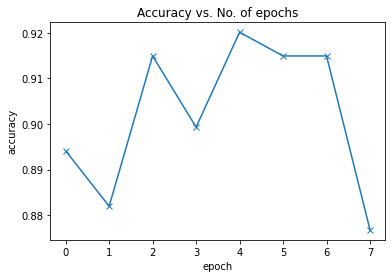

In [ ]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

plot_accuracies(history)

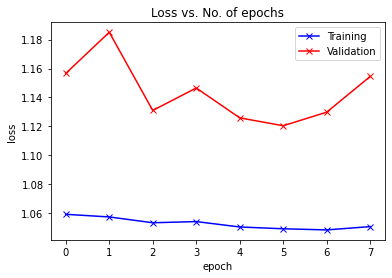

In [ ]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

plot_losses(history)

In [ ]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), DEVICE)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    prob, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return preds[0].item()

In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn

test_pred = []
test_true = []
true_pos = 0
false_pos = 0
false_neg = 0

for i in range(len(test_data)):
  img, label = test_data[i]
  out = predict_image(img,model)
  test_true.append(dataset.classes[label])
  test_pred.append(dataset.classes[out])

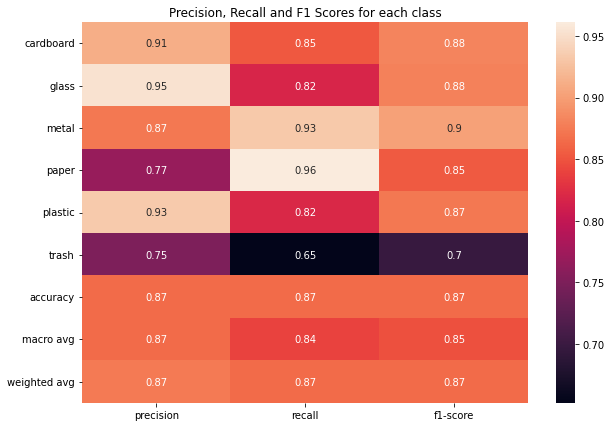

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(test_true,test_pred,target_names=dataset.classes,output_dict=True)  
plt.figure(figsize = (10,7))
plt.title('Precision, Recall and F1 Scores for each class')
# .iloc[:-1, :] to exclude support
sn.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True)

Label: paper , Predicted: paper


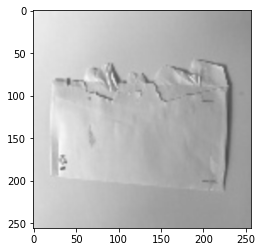

In [ ]:
img, label = test_data[25]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', dataset.classes[predict_image(img, model)])

**As analyzed from the above two techniques used, i.e., KNN and CNN, We achieved approximately 91% accuracy using CNN whereas using KNN approximately 42% accuracy was achieved. Hence, we conclude that CNN is much better than KNN for multiclass classification of images.**